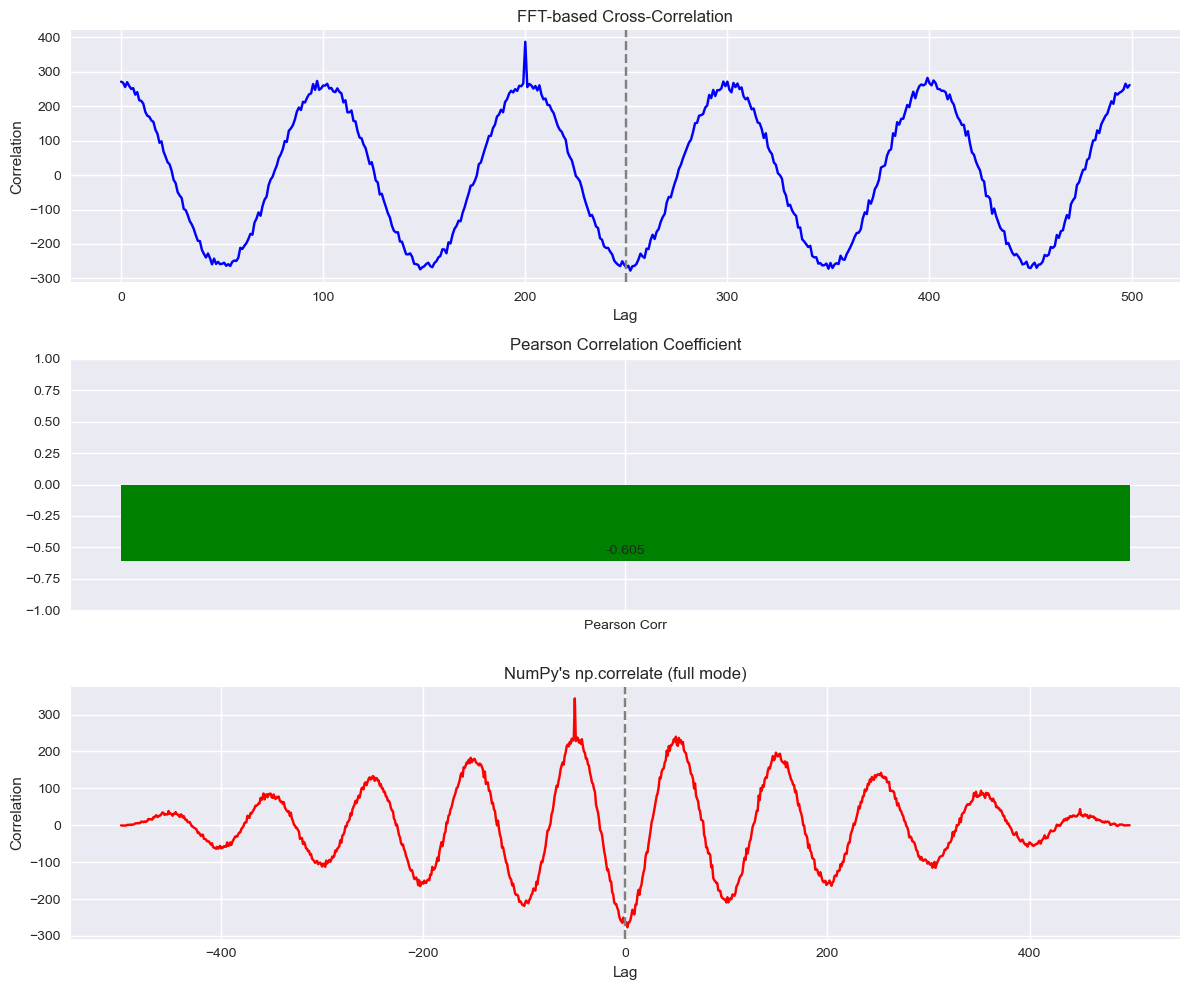

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy.fft import fft, ifft

# -----------------------------
# 1. Generate synthetic signals
# -----------------------------
np.random.seed(0)
t = np.linspace(0, 1, 500)

# Base signal
signal1 = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(500)

# Shifted + noisy version
shift = 50
signal2 = np.roll(signal1, shift) + 0.5 * np.random.randn(500)

# -----------------------------
# 2. FFT-based cross-correlation
# -----------------------------
def fft_cross_correlation(x, y):
    f1 = fft(x)
    f2 = fft(y)
    cc = ifft(f1 * np.conj(f2))
    return np.real(cc)

fft_corr = fft_cross_correlation(signal1, signal2)
fft_corr = np.roll(fft_corr, len(fft_corr)//2)  # center the peak

# -----------------------------
# 3. Pearson correlation
# -----------------------------
pearson_corr, _ = pearsonr(signal1, signal2)

# -----------------------------
# 4. NumPy correlation
# -----------------------------
numpy_corr = np.correlate(signal1, signal2, mode='full')

# -----------------------------
# 5. Plot results
# -----------------------------
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# FFT cross-correlation
axs[0].plot(fft_corr, color='blue')
axs[0].set_title('FFT-based Cross-Correlation')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Correlation')
axs[0].axvline(len(fft_corr)//2, color='gray', linestyle='--')

# Pearson correlation
axs[1].bar(['Pearson Corr'], [pearson_corr], color='green')
axs[1].set_ylim(-1, 1)
axs[1].set_title('Pearson Correlation Coefficient')
axs[1].text(0, pearson_corr + 0.05, f"{pearson_corr:.3f}", ha='center')

# NumPy correlate
lags = np.arange(-len(signal1)+1, len(signal1))
axs[2].plot(lags, numpy_corr, color='red')
axs[2].set_title("NumPy's np.correlate (full mode)")
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Correlation')
axs[2].axvline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


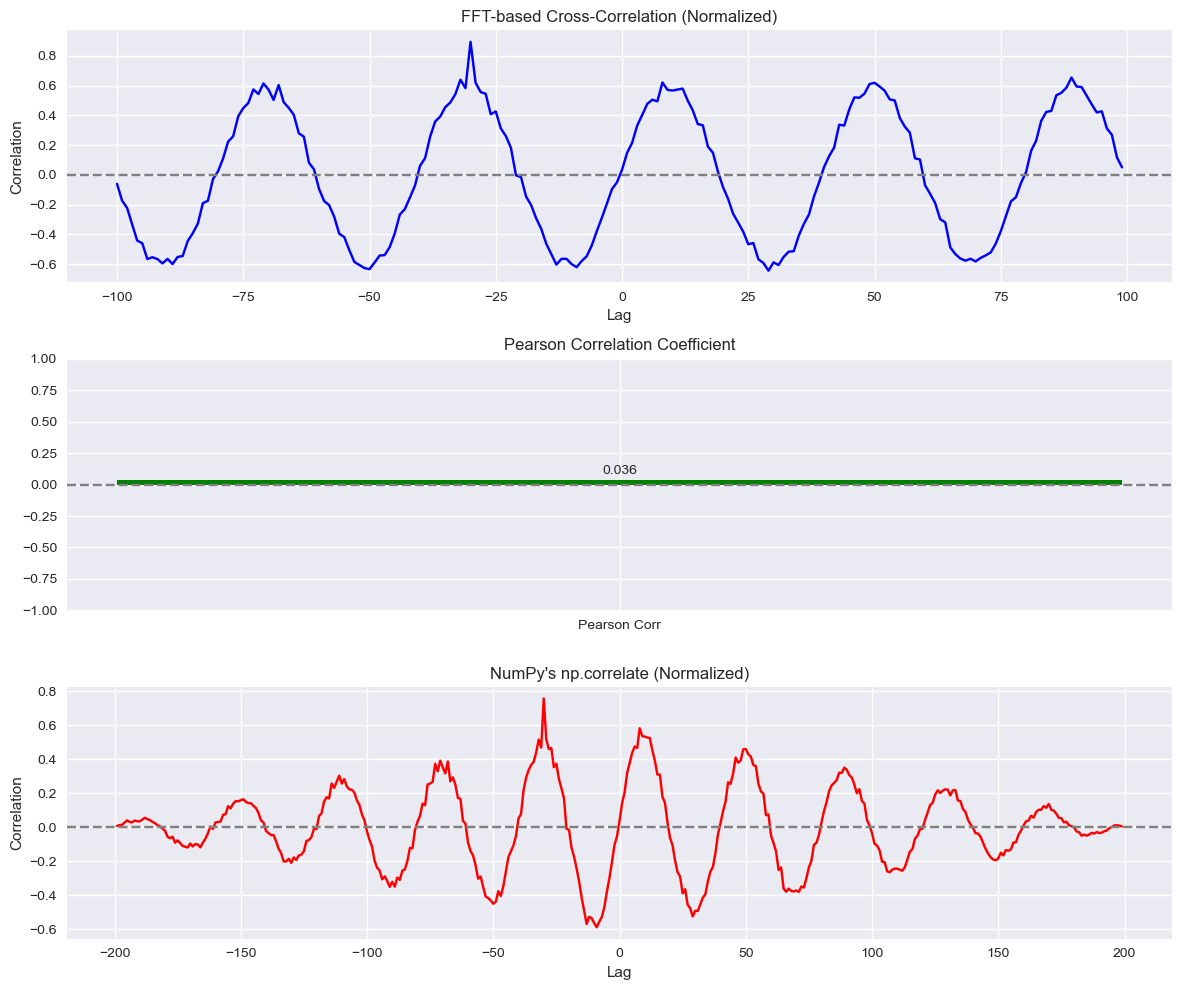

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy.fft import fft, ifft

# -----------------------------
# 1. Generate synthetic signals
# -----------------------------
np.random.seed(0)
N = 200
t = np.linspace(0, 1, N)
signal1 = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(N)
signal2 = np.roll(signal1, 30) + 0.5 * np.random.randn(N)  # shifted + noisy

# -----------------------------
# 2. FFT-based cross-correlation (normalized)
# -----------------------------
def fft_cross_correlation(x, y):
    f1 = fft(x)
    f2 = fft(y)
    cc = ifft(f1 * np.conj(f2))
    cc = np.real(cc)
    # Normalize to [-1, 1]
    return cc / (np.std(x) * np.std(y) * len(x))

fft_corr = fft_cross_correlation(signal1, signal2)
fft_corr = np.roll(fft_corr, len(fft_corr)//2)  # center peak

# -----------------------------
# 3. Pearson correlation
# -----------------------------
pearson_corr, _ = pearsonr(signal1, signal2)

# -----------------------------
# 4. NumPy correlation (normalized)
# -----------------------------
numpy_corr = np.correlate(signal1 - np.mean(signal1),
                          signal2 - np.mean(signal2),
                          mode='full')
numpy_corr /= (np.std(signal1) * np.std(signal2) * len(signal1))
lags = np.arange(-len(signal1)+1, len(signal1))

# -----------------------------
# 5. Plot results
# -----------------------------
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# FFT cross-correlation
axs[0].plot(np.arange(-N//2, N//2), fft_corr, color='blue')
axs[0].set_title('FFT-based Cross-Correlation (Normalized)')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Correlation')
axs[0].axhline(0, color='gray', linestyle='--')

# Pearson correlation
axs[1].bar(['Pearson Corr'], [pearson_corr], color='green')
axs[1].set_ylim(-1, 1)
axs[1].set_title('Pearson Correlation Coefficient')
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].text(0, pearson_corr + 0.05, f"{pearson_corr:.3f}", ha='center')

# NumPy correlate
axs[2].plot(lags, numpy_corr, color='red')
axs[2].set_title("NumPy's np.correlate (Normalized)")
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Correlation')
axs[2].axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()
